# Nonnegative Matrix Factorization

## Introduction

In the following, we are going to decompose some hyperspectral data using NMF and look at the possible features as a result.

Assuming a matrix $\textbf{M}$ of dimensions $I \times J$ and nonnegative-rank $R_+$, computing the NMF is equivalent to solving the cost function:

$$\textrm{arg}\min_{\textbf{W},\textbf{H}}{ \frac{1}{2} \| \textbf{M} - \textbf{W} \textbf{H}^\top \|_F^2 } \textrm{ s.t. } \textbf{W}\succeq 0, \textbf{H}\succeq 0$$

Where:
+ As shown by the constraints, the factors are element-wise nonnegative.
+ $\textbf{W}\in\mathbb{R}^{I\times R_+}$, the first factor matrix, is related to the first mode of $\textbf{M}$.
+ $\textbf{H}\in\mathbb{R}^{J\times R_+}$, the second factor matrix, is related to the second mode of $\textbf{M}$.

NMF is generally useful since the results are nonnegative and thus physically interpretable.

In most of the cases, the choice of $R_+$ is not optimal to represent the data perfectly, so the minimization ends up with a reconstruction error, widely computed through the Room Mean Squared Error (RMSE). Moreover, sometimes $R_+$ is estimated or set-up according to the predefined or desired number of components.

Unlike SVD, the factor matrices of NMF are not orthogonal.

As for the computations below, we perform NMF using Scikit's library. Scikit has a good library for matrix decomposition techniques (Truncated SVD, PCA, NMF, _etc_).

#### References:
+ Scikit-learn: Machine Learning in Python, Pedregosa et al., JMLR 12, pp. 2825-2830, 2011.
+ API design for machine learning software: experiences from the scikit-learn project, Buitinck et al., 2013.

---

### NMF of Hyperspectral Data

First, we load a hyperspectral image (HSI) and reshape it into a matrix.

In [1]:
import numpy as np
from numpy import linalg as la
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt1
from sklearn.decomposition import NMF
np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})

# Load HSI of Pavia University:
from scipy.io import loadmat
# D = loadmat("C:/Users/mhmdj/myAnaconda/Toulouse_Mauro/Matrices/pavia_uni.mat")
D = loadmat("../data/pavia_uni.mat")
D = D['pavia_uni']
dim_D = np.shape(D)
print("The hyperspectral image has dimensions:", dim_D)

The hyperspectral image has dimensions: (610, 340, 103)


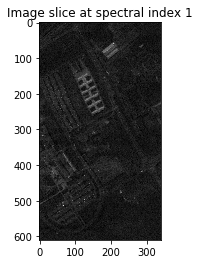

In [2]:
# Show slices of images
ind = 1
img = np.array(D)[:,:,ind-1]
imgplot = plt.imshow(img, cmap='gray')
imgplot = plt.title("Image slice at spectral index " + "{:d}".format(ind))

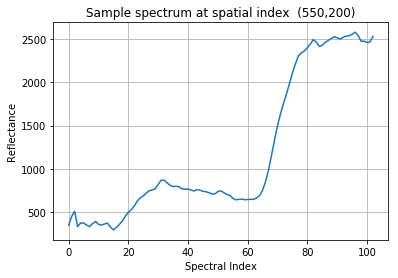

In [3]:
# Show a sample spectrum at a pixel
pix1 = 550
pix2 = 200
spectrum = D[pix1-1 , pix2-1 , :]
plt.plot( spectrum )
plt.title("Sample spectrum at spatial index  (" + "{:d}".format(pix1) + "," + "{:d}".format(pix2) + ")")
plt.xlabel('Spectral Index')
plt.ylabel('Reflectance')
plt.grid(True)

In [4]:
# Reshape the HSI into an image of pixels and spectral bands:
M = np.array( np.reshape(D, (dim_D[0]*dim_D[1],dim_D[2])) )
dim_M = np.shape(M)
print("The reshaped matrix has dimensions:", dim_M)

The reshaped matrix has dimensions: (207400, 103)


Now we compute the NMF of the data set using Scikit's NMF package (might take a couple of seconds):

In [11]:
# Nonnegative Matrix Factorization

# Choose the value of the nonnegative rank R_p (the number of components of the factor matrices)
R_p = 5
# Compute the NMF
model = NMF(n_components=R_p, init='random', random_state=0)
W = model.fit_transform(M)
H = np.transpose( model.components_ )
rec_err = model.reconstruction_err_ / la.norm(M) * 100

print("Matrix W has dimensions:", np.shape(W))
print("Matrix H has dimensions:", np.shape(H))
print("The reconstruction error is " + "{:.2f}".format(rec_err) + "%")

Matrix W has dimensions: (207400, 5)
Matrix H has dimensions: (103, 5)
The reconstruction error is 3.68%


After obtaining the result, we can see that $\textbf{W}$ and $\textbf{H}$ have $R_+$ columns.

In general, $\textbf{W}$ and $\textbf{H}$ describe the first and second modes of $\textbf{M}$ respectively, which means in this case that $\textbf{W}$ corresponds to spatial information, while $\textbf{H}$ corresponds to spectral information. We can visualize this by looking into the components (columns) of the two factors.

The code below shows a column from $\textbf{W}$ (reshaped as an image) and its corresponding column from $\textbf{H}$.

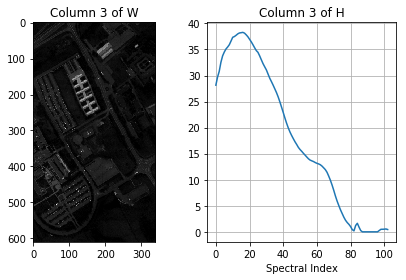

In [10]:
# Choose a column index
col_ind = 3
W_col = np.array( np.reshape(W[:,col_ind-1], (dim_D[0],dim_D[1]) ) )
H_col = np.array( H[:,col_ind-1] )

# Print grayscale image
plt.subplot(1, 2, 1)
imgplot = plt.imshow( W_col , cmap='gray')
plt.title("Column " + "{:d}".format(col_ind) + " of W")

plt.subplot(1, 2, 2)
plt.plot( H_col )
plt.title("Column " + "{:d}".format(col_ind) + " of H")
plt.xlabel('Spectral Index')
plt.grid(True)

plt.tight_layout()
plt.show()


By looking at the different components, what do you think about the columns of $\textbf{W}$ and their relationship with those in $\textbf{H}$?

---